In [ ]:
import pandas as pd
data = pd.read_csv('train.csv')

### Find shape of our dataset

In [2]:
print(f'Rows: {data.shape[0]}, Cols: {data.shape[1]}')

Rows: 891, Cols: 12


### Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Get Overall Statistics About The Dataframe

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Filtering

In [5]:
data[['Name', 'Age']]

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
886,"Montvila, Rev. Juozas",27.0
887,"Graham, Miss. Margaret Edith",19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,"Behr, Mr. Karl Howell",26.0


### Check Null Values In The Dataset

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Drop the Column

In [7]:
data.drop('Cabin', axis=1, inplace=True)

### Handle Missing values


In [ ]:
data['Embarked'].fillna('S', inplace=True) # fill missing values with 'S'
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

### Categorical Data Encoding

In [ ]:
# Categorical Data Encoding is the process of converting categories to numbers (like that of the 'Embarked' and 'Sex' columns)
data['Sex'].unique() # First we check the unique values in the column
data['Gender'] = data['Sex'].map({'male': 0, 'female': 1}) # Then we map the values to numbers
data

## Univariate Analysis
- a statistical procedure that examines a single variable in a data set to describe its distribution and characteristics

## How Many People Survived And How Many Died?

In [24]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### How Many Passengers Were In First Class, Second Class, and Third Class?

In [26]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

### Number of Male And Female Passengers

In [30]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

## Bivariate Analysis
- It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them.

### Who Has Better Chance of Survival Male or Female?

<Axes: xlabel='Sex', ylabel='Survived'>

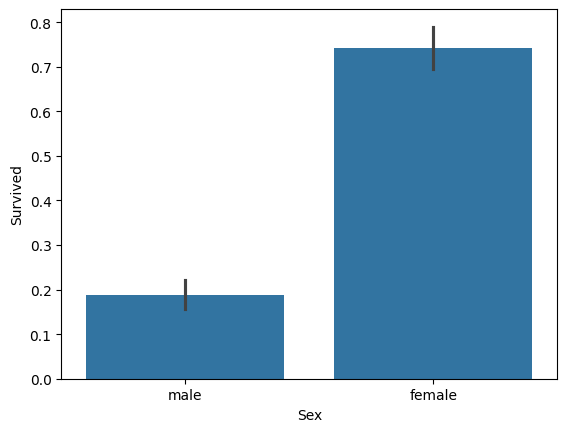

In [32]:
data.groupby('Sex')['Survived'].mean()
sns.barplot(x='Sex', y='Survived', data=data)

### Which Passenger Class Has Better Chance of Survival (First, Second, Or Third Class)? 

<Axes: xlabel='Pclass', ylabel='Survived'>

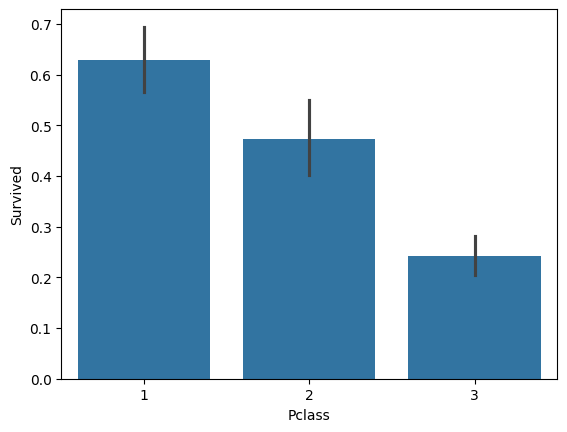

In [33]:
data.groupby('Pclass')['Survived'].mean()
sns.barplot(x='Pclass', y='Survived', data=data)

# Feature Engineering

In [37]:
data['Family_Size'] = data['SibSp'] + data['Parch'] + 1
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1
